# Exercise Ten: Mapping, Twitter Style - Complete

If you have an approved Twitter account, refer to last week's demo for help importing tweets. This demo assumed you haven't received approval, and works from an imported spreadsheet generated using TAGs.

Your application should:

- Import or collect tweets using a keyword or hashtag. Watch your rate limiting!
- Use Pandas to sort and analyze your tweets. 
- Calculate user coordinates, where feasible, for the set of collected tweets. Again, watch your rate limiting!
- Map the tweets using the calculated locations.
- Use at least one data visualization from a previous exercise, demo, or the course text to analyze a different element of your tweets.

As a bonus challenge, try to map some other quality of your data. For instance, you might only map the locations where a certain word or hashtag is used, or try to visualize the quantity of tweets that share a location using a larger radius dot.

In [1]:
import pandas as pd

df = pd.read_csv('NFTtweets.csv')
print(df.dtypes)


id_str                       float64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates              float64
user_lang                    float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str             float64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
user_location                 object
status_url                    object
entities_str                  object
dtype: object


In [7]:
tdf = df[['from_user', 'user_location','text']]
print(tdf)

            from_user                 user_location  \
0     kookiemintcityx                       she/her   
1          zoirecityx  ( anypro ) personal ft cyber   
2        investor_YGM                   鹿と大仏に護られし聖域   
3           beartoown                           NaN   
4           gigimi555                           NaN   
...               ...                           ...   
2965       Jenny13344                           NaN   
2966           AyoGee                           NaN   
2967         Xfr1end1                           NaN   
2968     AmuletPromos                           NaN   
2969   KartalBjk1903_                           NaN   

                                                   text  
0     RT @cryptoleblanc: 🙏I'm proud of this project ...  
1     RT @cryptoleblanc: 🙏I'm proud of this project ...  
2     RT @OMARUSA10164: ✨GIVEAWAY  4000 followers ✨ ...  
3     RT @SanguineForge: https://t.co/GEx0dQYXmt\n W...  
4     RT @BitQueeNFTs: 🎉🎁Frankie #NFTGiveaway🎁🎉\n

In [8]:
locs = tdf['user_location'].value_counts()
print(locs)

Bangkok, Thailand          55
Thailand                   54
Indonesia                  44
Italy                      34
Brooklyn, NY               26
                           ..
Kadıköy, İstanbul           1
turn off my retweet pls     1
Solo, Indonesia             1
youniverse                  1
Where the x100s are.🐰       1
Name: user_location, Length: 777, dtype: int64


In [10]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=.5)

def find_location(row):
    place = row['user_location']
    location = limited(place)
    
    if location != None:
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf


RateLimiter caught an error, retrying (0/2 tries). Called with (*('🇮🇩',), **{}).
Traceback (most recent call last):
  File "C:\Users\an111789\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\an111789\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\an111789\Anaconda3\lib\site-packages\urllib3\connection.py", line 411, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\an111789\Anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 428, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\an111789\Anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 472, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\an111789\Anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._create(
  File "C:\Users\an111789\Anaconda3\li

,from_user,user_location,text,latitude,longitude
0,kookiemintcityx,she/her,RT @cryptoleblanc: 🙏I'm proud of this project ...,23.100428,120.294918
1,zoirecityx,( anypro ) personal ft cyber,RT @cryptoleblanc: 🙏I'm proud of this project ...,Not Found,Not Found
2,investor_YGM,鹿と大仏に護られし聖域,RT @OMARUSA10164: ✨GIVEAWAY 4000 followers ✨ ...,Not Found,Not Found
3,beartoown,NaN,RT @SanguineForge: https://t.co/GEx0dQYXmt\n W...,46.314475,11.048029
4,gigimi555,NaN,RT @BitQueeNFTs: 🎉🎁Frankie #NFTGiveaway🎁🎉\n\n1...,46.314475,11.048029
...,...,...,...,...,...
2965,Jenny13344,NaN,RT @_quickben: 🚨GIVEAWAY ALERT🚨\n\nTo celebrat...,46.314475,11.048029
2966,AyoGee,NaN,RT @NFTVERSE_TOKEN: ** $NVERSE GIVEAWAY **\nFO...,46.314475,11.048029
2967,Xfr1end1,NaN,RT @CryptoVishal1: 🎁🎉Founders Treasure Chest #...,46.314475,11.048029
2968,AmuletPromos,NaN,RT @RobinHoodNFTs: Crazy #NFTGiveaway !! 🚨\n\n...,46.314475,11.048029


In [12]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

In [33]:
tdf = tdf[tdf['latitude'] != 'Not Found']
tdf = tdf[tdf['longitude'] != 'Not Found']

lats = tdf['latitude']
longs = tdf['longitude']

print(lats)
print(longs)


0       23.100428
3       46.314475
4       46.314475
5       41.875562
6       46.314475
          ...    
2965    46.314475
2966    46.314475
2967    46.314475
2968    46.314475
2969    46.314475
Name: latitude, Length: 2554, dtype: object
0       120.294918
3        11.048029
4        11.048029
5       -87.624421
6        11.048029
           ...    
2965     11.048029
2966     11.048029
2967     11.048029
2968     11.048029
2969     11.048029
Name: longitude, Length: 2554, dtype: object


In [35]:
lats.index=range(0,len(lats))
longs.index=range(0,len(longs))

print(lats)

0       23.100428
1       46.314475
2       46.314475
3       41.875562
4       46.314475
          ...    
2549    46.314475
2550    46.314475
2551    46.314475
2552    46.314475
2553    46.314475
Name: latitude, Length: 2554, dtype: object


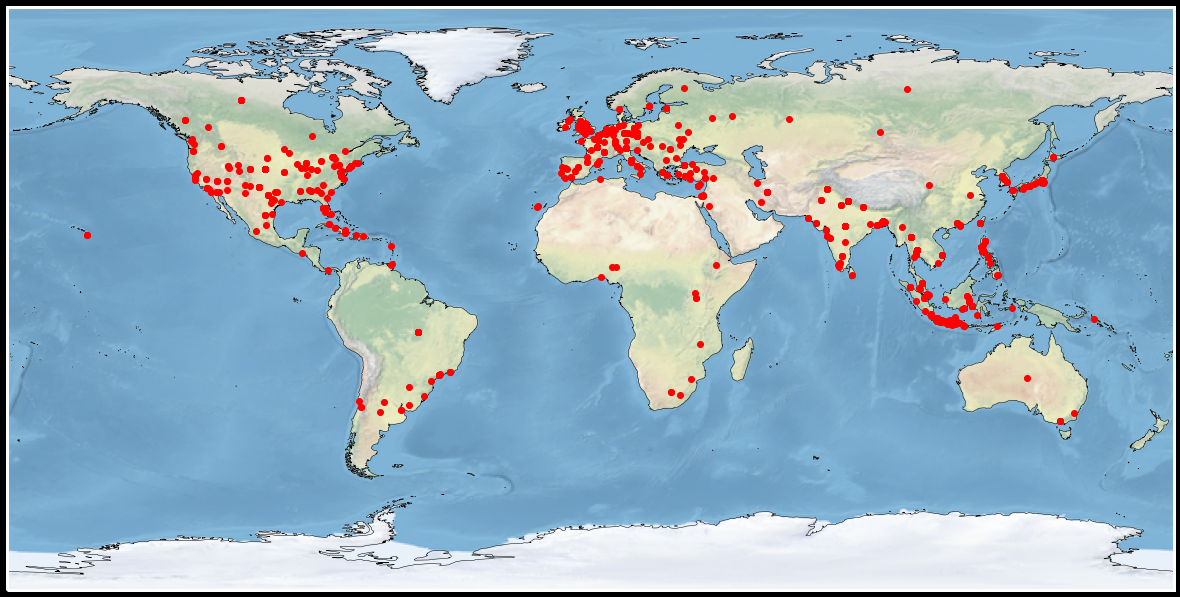

In [36]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                    
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()


In [45]:
counter = tdf.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'})

print(counter)

      latitude   longitude  count
0   -37.856087  144.991981      1
1   -37.814218  144.963161      2
2   -35.282976  149.125641      1
3   -34.996496  -64.967282      1
4   -34.607568  -58.437089      1
..         ...         ...    ...
357  58.595904   23.219646      3
358  59.325117   18.071093      4
359  61.066692 -107.991707      5
360  64.686314   97.745306      1
361  64.884758   28.914591      1

[362 rows x 3 columns]


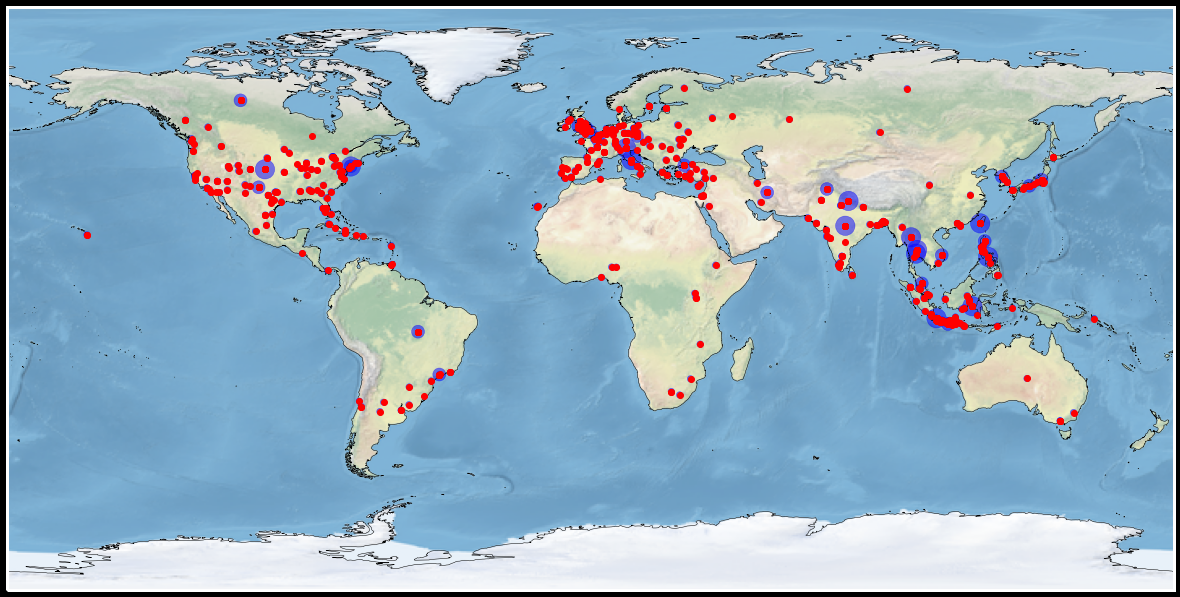

In [58]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
# plot individual locations                                                                                                       
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                           
# add coastlines for reference                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()
def get_radius(freq):
    if freq < 5:
        return 1
    elif freq < 10:
        return 2
    elif freq >= 10:
        return 3
# plot count of tweets per location

colLats = counter['latitude']
colLongs = counter['longitude']
colCounts = counter['count']

for i in range(0, len(counter)):
    ax.add_patch(Circle(xy=[colLongs[i], colLats[i]], radius=get_radius(colCounts[i]), color='blue',alpha=0.5, transform=ccrs.PlateCarree()))

plt.show()